In [36]:
from utils import *
from metadata import *
from gen_imglst import * 
from vis_utils import * 
from hypers import imagenet as FLAGS
import utils
import tensorflow as tf
# utils.init_dev(utils.get_dev())
# utils.allow_growth()

%load_ext autoreload
# %reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
g

In [7]:
def two_level(thresh):
    cls=[]
    fls=[]

    tree_ =slim_tree(tree,condition=imagenet10k)


    for node in nx.dfs_preorder_nodes(tree_, 'fall11'):
        depth = tree_.node[node]['depth']
        nchild= tree_.node[node]['nchild'] 
        if (depth<=thresh and nchild==0) :
            cls.append(node) 
            fls.append([node]) 
        elif (depth>=thresh and nchild!=0):
            cls.append(node) 
            fls.append(find_child(tree_,node)) 


    len(cls)
    len(fls)

    g=nx.DiGraph()
    for fl,cl in zip(fls,cls):
        g.add_edge('fall11',cl)
        for fl_ in fl:
            g.add_edge(cl,fl_)


    tag_tree(g)

    vis_nx(g)
    return g 

In [11]:
def nx2graph(nxgraph):
    nx.write_gml(nxgraph,'tmp.gml')
    g=load_graph('tmp.gml')
    return g 




{'depth': <PropertyMap object with key type 'Vertex' and value type 'double', for Graph 0x7f6b0a425a10, at 0x7f6af9e49810>, 'nchild': <PropertyMap object with key type 'Vertex' and value type 'double', for Graph 0x7f6b0a425a10, at 0x7f6afa03f8d0>, 'label': <PropertyMap object with key type 'Vertex' and value type 'string', for Graph 0x7f6b0a425a10, at 0x7f6afa397b90>}

In [8]:
def vis_graph(nxgraph):
    if isinstance(nxgraph,nx.DiGraph):
        g=nx2graph(nxgraph)
    else:
        g=nxgraph
    graph_draw(g,pos=sfdp_layout(g),
               vertex_color=[1,1,1,0],
#                vertex_fill_color=
#                vertex_size=1,
               edge_pen_width=.09,
#                vcmap=matplotlib.cm.winter,
               output='tmp.png')
# graph_draw(g,pos=radial_tree_layout(g,5561),
#                vertex_color=[1,1,1,0],
# #                vertex_fill_color=
# #                vertex_size=1,
#                edge_pen_width=.09,
# #                vcmap=matplotlib.cm.winter,
#                output='tmp.png')

In [51]:
ad=g.all_depth 
ad=np.array(ad)
len(ad[ad==1])

6415

In [9]:
g=two_level(4)

In [12]:
vis_graph(g)

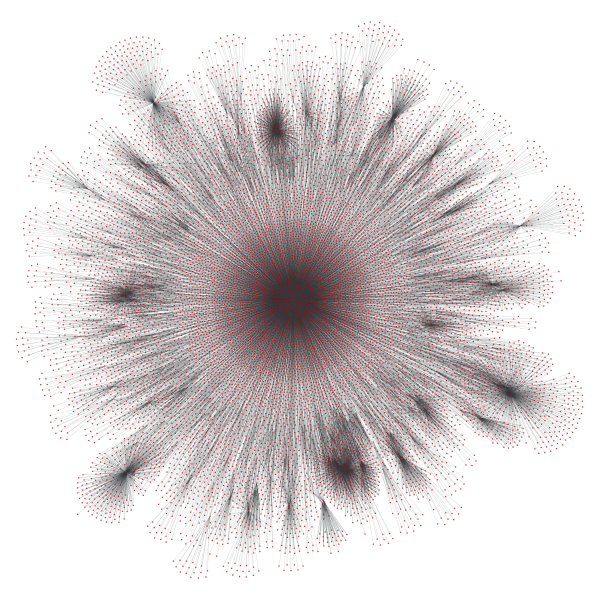

In [16]:
show_img('tmp.png')

(array([  6.41500000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1.00000000e+00,   6.42400000e+02,   1.28380000e+03,
          1.92520000e+03,   2.56660000e+03,   3.20800000e+03,
          3.84940000e+03,   4.49080000e+03,   5.13220000e+03,
          5.77360000e+03,   6.41500000e+03]),
 <a list of 10 Patch objects>)

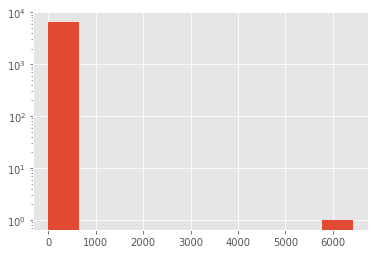

In [43]:
ac=g.all_nchild
ac=np.array(ac)
ac=ac[ac!=0]
plt.hist(ac)
plt.yscale('log')

(array([ 4466.,   686.,   350.,   224.,   133.,    90.,    62.,    52.,
           40.,    34.,    23.,    30.,    19.,    13.,    14.,    12.,
           10.,    11.,    12.]),
 array([  1.        ,   1.94736842,   2.89473684,   3.84210526,
          4.78947368,   5.73684211,   6.68421053,   7.63157895,
          8.57894737,   9.52631579,  10.47368421,  11.42105263,
         12.36842105,  13.31578947,  14.26315789,  15.21052632,
         16.15789474,  17.10526316,  18.05263158,  19.        ]),
 <a list of 19 Patch objects>)

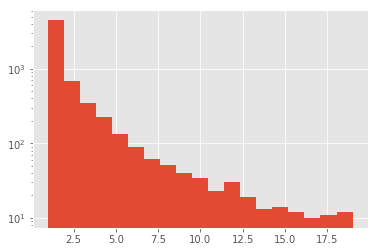

In [48]:
anc=np.array(g.all_nchild)
anc=anc[anc<20]
anc=anc[anc!=0]
plt.hist(anc,bins=19)
plt.yscale('log')

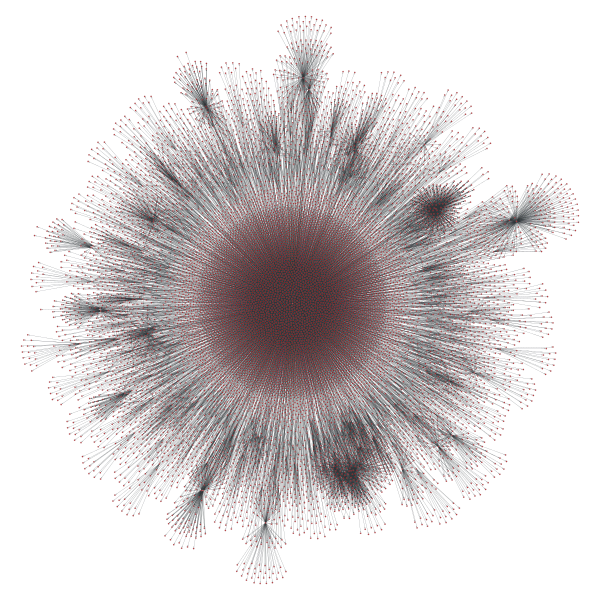

In [6]:
two_level(5)

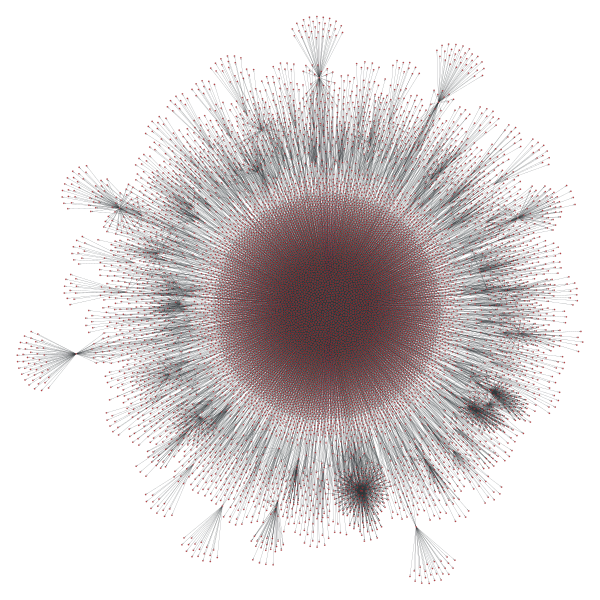

In [7]:
two_level(6)

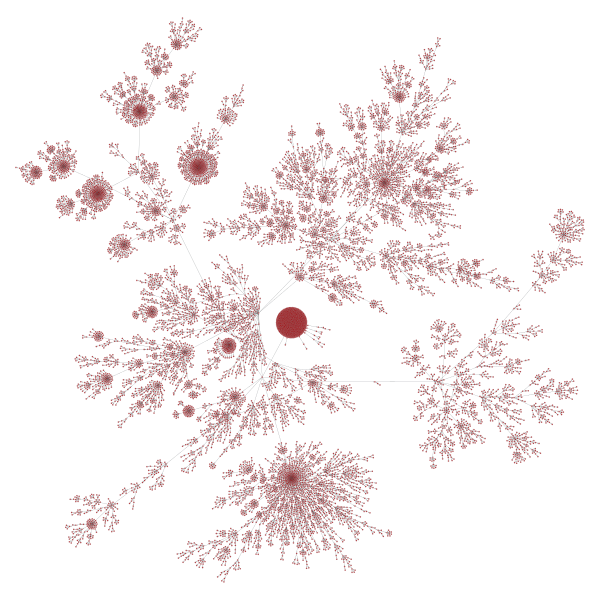

In [79]:
from vis_utils import * 
vis_nx(tree_)

In [20]:
from gen_imglst import * 
len(find_child(tree_,'fall11',False))

9999

In [34]:
leaves=find_child(tree_,'fall11',False) 
leaves=np.sort(leaves)

In [35]:
imagenet10k=np.sort(imagenet10k)

In [36]:
np.setdiff1d(imagenet10k,leaves)

array(['n02654425'],
      dtype='|S9')

In [93]:
depths=[]
nimgsn=[]

In [86]:
from metadata import * 
%pwd

%cd /home/wangxinglu/prj/few-shot/src

nimgs=unpickle('./nimgs.pkl')

u'/mnt/nfs1703/test/prj/few-shot'

/mnt/nfs1703/test/prj/few-shot/src


In [94]:
for node in nx.dfs_preorder_nodes(tree_,'fall11'):
#     print node
    if tree_.node[node]['nchild']==0:
        depths.append(tree_.node[node]['depth']) 
        nimgsn.append(nimgs[node])

In [95]:
len(depths)
len(nimgsn)

9999

9999

11

In [116]:
min(depths),max(depths)

(2, 12)

In [117]:
means=[]
stds=[]
nimgsn=np.array(nimgsn)
depths=np.array(depths)
for d in range(min(depths),max(depths)+1):
    w=nimgsn[depths==d]
    
    means.append(np.mean(w))
    stds.append(np.std(w))

In [118]:
means,stds

([567.00954478707786,
  497.47695852534559,
  529.21124206708976,
  544.02915291529155,
  592.35744016649323,
  587.4849498327759,
  590.09888888888884,
  655.09036144578317,
  589.49009900990097,
  640.10919540229884,
  557.01098901098896],
 [453.96028347103521,
  498.10478666777379,
  491.89819003208731,
  481.13684328513978,
  486.73074553239081,
  477.4687266099732,
  477.08458625615845,
  484.4160500081432,
  482.83796187408763,
  479.76067384511435,
  455.80286597003141])

In [12]:
means,stds = ( [567.00954478707786,
  497.47695852534559,
  529.21124206708976,
  544.02915291529155,
  592.35744016649323,
  587.4849498327759,
  590.09888888888884,
  655.09036144578317,
  589.49009900990097,
  640.10919540229884,
  557.01098901098896],
 [453.96028347103521,
  498.10478666777379,
  491.89819003208731,
  481.13684328513978,
  486.73074553239081,
  477.4687266099732,
  477.08458625615845,
  484.4160500081432,
  482.83796187408763,
  479.76067384511435,
  455.80286597003141])

<Container object of 3 artists>

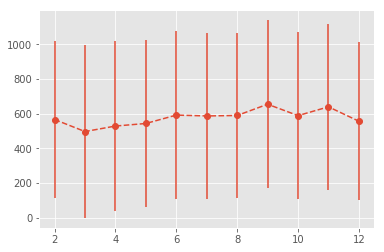

In [15]:
plt.errorbar(np.arange(2,13),means,yerr=stds,fmt='--o')

In [113]:
rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)a
a

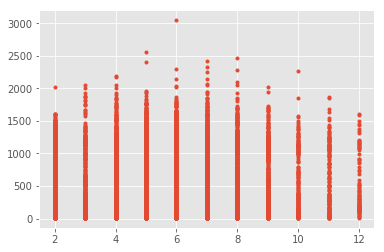

In [98]:
plt.plot(depths,nimgsn,'.')

In [ ]:
from utils import *
from metadata import *
from model_utils import *
from gen_imglst import *

import utils
%load_ext autoreload
# %reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def run():
    pred,lb = get_prediction()
    print per_cls_acc(pred,lb)

def get_prediction(path='/mnt/nfs1703/test/prj/few-shot/models/res101.img10k.longtail.flatten3'):
    f=load_model(path)
    utils.rm('cache.h5')
    ff=h5py.File('cache.h5')
    ind=0
    while ind<129678:
#         try:
        f.feed()
#         append_file(str(ind),'val.ok')
#         except Exception as  inst :
#             print inst, ind
#             break

        f.forward()
#         lbs.append(f.data('label').value())
        #     datas.append(f.data('data').value())
#         fcs.append(f.data('luzai.cls').value())
        lbs=f.data('label').value()
        ff['lbs/'+str(ind)]=lbs
        ff['fcs/'+str(ind)]=f.data('data').value()
        ind+=lbs[-1].shape[-1]
    
    ff.close()
    f.close()
#     return pred,lb


def per_cls_acc(pred,lb):
    ### per cls acc
    cnts,bounds,_=plt.hist(lb,bins=10000,range=(-0.5,10000-0.5))
#     assert len(cnts[cnts==0])==0, 'val must have some samples'
    print  len(cnts[cnts==0])
    print(min(cnts))
#     cnts[cnts==0]+=1

    from sklearn.metrics import confusion_matrix
    conf = confusion_matrix(lb, pred,np.arange(0,10000)).astype(float)

    plt.figure()
    plt.plot(np.diag(conf)/cnts)

    plt.figure()
    cnts,bounds,_=plt.hist(lb,bins=10000,range=(-0.5,10000-0.5))
#     markerline, stemlines, baseline =plt.stem(cnts*np.diag(conf)/cnts)
#     _=plt.setp(baseline, 'color', 'b')
#     _=plt.setp(stemlines,'color','b')
    plt.plot(cnts*np.diag(conf)/cnts)
    print np.mean(lb==pred) , np.nanmean(np.diag(conf)/cnts)
    return  np.mean(lb==pred) , np.nanmean(np.diag(conf)/cnts)

def analyze(aname):
    aname+='.h5'
    if not osp.exists(aname): return  
    f=h5py.File(aname,'r')
    orders = f['fcs'].keys()

    lbs=[f['lbs/'+l].value for l in orders]
    fcs=[f['fcs/'+l].value for l in orders]

    lb=np.concatenate(lbs,axis=-1)
    fc=np.concatenate(fcs,axis=-1)

    pred=np.argmax(fc,axis=0)
    pred=pred.reshape((pred.shape[-1],))
    lb=lb.reshape((lb.shape[-1],))
    per_cls_acc(pred,lb)

for aname in [ 
    'res101.img10k.longtail.flatten.undercomp',
    'res101.img10k.longtail.flatten3',
    'res101.img10k.longtail.flatten2',
    'res101.img10k.no1k.flatten.2048'
] :
    print analyze(aname)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
33
0.0


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in divide


0.213974951953 0.0967932057975
None
0
3.0
0.359539448211 0.197254044061
None
33
0.0
0.393639077207 0.231113483456
None
